# Linear Regression

----

### Contents:

1. Regression Background
2. Imports
2. Load Dataset
3. EDA
5. Train-Test split


6. Linear Regression Modelling by Hand
    - 6.1. By Hand
    - 6.2. By model
        - 6.2.1. Parameter Estimation
        - 6.2.2. Prediction(test) vs Explanation(train)
        - 6.2.3. New Predictions
        - 6.2.4. Projection Matrix (H-Matrix)
        - 6.2.5. Interval Estimates for Training vs Testing


7. Hypothesis Testing


8. Linear Regression Diagnostics
    - 1. Linearity
    - 2. Independence
    - 3. Homoskedascity
    - 4. Normality


9. Generalized Least Squares (GLS)
    - 9.1. By Hand
    - 9.2. By Hand (alternate way)
    - 9.3. By model
    
    
10. Weighted Least Squares (WLS)


11. Regularization
----

## 1. Regression Background
******************************************************************

### 1. Intution

Let's assume, there are some N random Variables:

$ Y_1, Y_2, ..., Y_n -idd- N(\mu, \sigma^2)$


Now, we are considering cases for fixed $\mu$ but what if the mean is not fixed but a function!


Let's consider:


$Y = f(X\beta)$       

Given, Y is a linear function of $\beta$s, in such cases, we call it Linear Regression.

**If some assumptions are met and Y is in a linear relationship with some Constants ( $X, \beta$ ), the function is said to be Linear Regression.**


- $Simple \space Linear \space Regression: Y = \beta_0 + \beta_1.X + \epsilon$


- $Multiple \space Linear \space Regression: Y = \beta_0 + \beta_1.X_1 + \beta_2.X_2 + ... + \beta_p.X_p + \epsilon$


Also, often, while taking measurements for Xs, there will always be some measurement error which is denoted by $\epsilon$

---------------------------------------------------------------------------------------


### 2. Matrix Representation :

`Hypothetical Equation` for best fit line  (what we wish to achieve): 

$\mathbf{Y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$,

-OR-

$\begin{equation} Y_i = \beta_0 + \sum^p_{j=1}\beta_j x_{i,j} + \varepsilon_i,\end{equation}$ for $i = 1,...,n$, where $n$ is the number of data points (measurements in the sample), and $j = 1,...,p$, where

- $p+1$ is the number of parameters in the model.


- $Y_i$ is the $i^{th}$ measurement of the response variable.


- $x_{i,j}$ is the $i^{th}$ measurement of the $j^{th}$ predictor variable.


- $\varepsilon_i$ is the $i^{th}$ error term and is a random variable, often assumed to be $N(0, \sigma^2)$.


- $\beta_j$, $j = 0,...,p$ are unknown parameters of the model. We hope to estimate these, which would help us characterize the relationship between the predictors and response.

Matrix Formulation:

$\begin{bmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{n} \end{bmatrix} = \begin{bmatrix} 1 & x_{1,1} & x_{1,2} & ... & x_{1,p} \\ 1 & x_{2,1} & x_{2,2} & ... & x_{2,p} \\ \vdots & \ddots & \ddots & \vdots \\ 1& x_{n,1} & x_{n,2} & ... & x_{n,p} \end{bmatrix} * \begin{bmatrix} \beta_{0} \\ \beta_{1} \\ \vdots \\ \beta_{p} \end{bmatrix} + \begin{bmatrix} \epsilon_{1} \\ \epsilon_{2} \\ \vdots \\ \epsilon_{n} \end{bmatrix}$



where:

- Response Matrix (Y) : $\boldsymbol{Y} = {[} \begin{matrix} y_1 & y_2 & y_3 & ... & y_n\end{matrix} {]}^T$
- $dim(Y) = n * 1$

- Predictor Matrix (X): $\boldsymbol{X} = \begin{bmatrix} 1 & x_{1,1} & x_{1,2} & x_{1,3} & ... & x_{1,p} \\ 1 & x_{2,1} & x_{2,2} & x_{2,3} & ... & x_{2,p} \\ & ... & \\1 & x_{n,1} & x_{n,2} & x_{n,3} & ... & x_{n,p} \end{bmatrix}$
- $dim(X) = n * (p+1)$
- Parametric Matrix (beta): $\boldsymbol{\beta} = {[} \begin{matrix} \beta_0 & \beta_1 & ... & \beta_p\end{matrix} {]}^T$
- $dim(Y) = (p+1) * 1$
- Error Term Matrix (e): $\boldsymbol{\varepsilon} = {[} \begin{matrix} \varepsilon_1 & \varepsilon_2 & ... & \varepsilon_n\end{matrix} {]}^T$
- $dim(\varepsilon) = n*1$

---------------------------------------------------------------------------------------


### 3. Estimating $\beta$  (i.e. $\hat \beta$):

Four common methods:- 

- 1. Ordinary Least Squares (OLS)
- 2. Maximum Likelihood Estimation (MLE)
- 3. Generalized Least Squares (GLS)
- 4. Gradient Descent Optimzation (GDO)


Using OLS, or MLR  we basically wish to estimate $\hat \beta$ such that the *SSE (Sum of Squared Errors/Residuals)* is **minimized**, and we get the closest line possible. $\widehat \beta$  could be shown as:  



- $\widehat Y = X\widehat \beta$  


- Where, $\widehat \beta = (X^TX)^{-1}X^TY$  

---------------------------------------------------------------------------------------


### 4. Estimating $H$ Matrix:

$H$ matrix is just another name for the projection matrix and find it's trace:

$$\widehat Y = HY$$

$=> \widehat Y = X \widehat \beta$     
$=> \widehat Y = X (X^TX)^{-1}X^TY$  
$=> \widehat Y = HY$  

$=> H = X(X^TX)^{-1}X^T$ 


Now this is your final H matrix.

Here, let $A = X(X^TX)^{-1}$ and $B = X^T$ 

Applying commutative property of the trace operator: $tr(AB) = tr(BA)$ which could be easily derived (*just try multiplying two matrices and summing their diagonals*): 

$trace(H) = tr(X (X^TX)^{-1} X^T) = tr(AB) = tr(BA) = tr(X^T  . X (X^TX)^{-1} ) = tr(I_{X^TX}) = tr(I_{(p+1) \times n . n \times (p+1)} = tr(I_{p+1 \times p+1}) = tr(I_{p+1}) = tr(I_{p+1}) = \sum^{p+1}_{i=1} (1) = p+1$  

Therefore, **$trace(H) = p+1$**

---------------------------------------------------------------------------------------


### 5. Distrbituons and Sampling Distributions:

#### 5.1. ERROR TERM ~

$$\boldsymbol{\varepsilon_i} \sim N(\mathbf{0},\sigma^2I_n)$$

It can be assumed that the model is following all the regular assumptions and it tells us that each element of the Error Vector would be independently and identically distributed (iid) with mean equal to $0$ and variance $\sigma^2$.  This means, that for each error vector element, i.e. $\varepsilon_i \sim N(0,\sigma^2)$   such that,  $i=1,2,...,n$

$E(\varepsilon) = E \left(\begin{matrix} \varepsilon_0 \\ \varepsilon_1 \\ ... \\\varepsilon_n \end{matrix}\right) = \left(\begin{matrix} E(\varepsilon_0) \\ E(\varepsilon_1) \\ ... \\E(\varepsilon_n) \end{matrix}\right) = \left(\begin{matrix} 0 \\ 0 \\ ... \\ 0 \end{matrix}\right) = 0 $

$Var(\varepsilon) = Var\left(\begin{matrix} \varepsilon_{0,0} & \varepsilon_{0,1} & \cdots & \varepsilon_{0,n} \\ \varepsilon_{1,0} & \varepsilon_{1,1} & \cdots & \varepsilon_{1,n} \\ \vdots & \vdots & \ddots & \vdots \\ \varepsilon_{n,0} & \varepsilon_{n,1} & \cdots & \varepsilon_{n,n} \\ \end{matrix}\right) = \left(\begin{matrix} \sigma^2 & 0 & \cdots & 0 \\ 0 & \sigma^2 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \sigma^2 \\ \end{matrix}\right) = \sigma^2 \left(\begin{matrix} 1 & 0 & \cdots & 0 \\ 0 & 1 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & 1 \\ \end{matrix}\right) = \sigma^2I_n$

Since the expectation and variance of each element of the error matrix are $\mathbf{0}$ and $\sigma^2I_n$, respectively, we can conclude that $\varepsilon_i \sim N(0,\sigma^2)$ for any $i=1,2,...,n$ 

.

#### 5.2. RESPONSE (Y) ~

$$\mathbf{Y} \sim N(X\boldsymbol\beta, \sigma^2I_n)$$:

Since, it's understood that error term follows normality, with $\varepsilon_i \sim N(0,\sigma^2)$ and $X, \beta$ are constants:

$E[Y] = E[X\beta + \varepsilon] = E[X\beta] + E[\varepsilon] = X\beta.E[1] + E[\varepsilon] = X\beta + 0 = X\beta$

Since, we know:-  $Var[A] = E[A^2] - E[A]^2$

$Var[Y] = Var[X\beta + \varepsilon] = E[(X\beta + \varepsilon)^2] - E[X\beta + \varepsilon]^2$

$= E(X^2\beta^2 + 2X\beta\varepsilon + \varepsilon^2) - (E[X\beta] + E[\varepsilon])^2$

$=X^2\beta^2E[1] + 2X\beta E[\varepsilon] + E[\varepsilon^2] - X^2\beta^2E[1]^2 - E[\varepsilon]^2$

$=X^2\beta^2 - X^2\beta^2+ 0 + E[\varepsilon^2]  - E[\varepsilon]^2$

$=E[\varepsilon^2]  - E[\varepsilon]^2$

$=Var[\varepsilon] = \sigma^2I_n$

Therefore, $\mathbf{Y} \sim N(X\boldsymbol\beta, \sigma^2I_n)$

.

#### 5.3. Estimates of Parameters ($\widehat\beta$) ~

For the linear regression model $\mathbf{Y} = X\boldsymbol\beta + \boldsymbol{\varepsilon}$ 

- Regression parameters does not have sampling distributions.
- Estimators of regression parameters have sampling distributions.


$$\hat \beta \sim N(\boldsymbol\beta,  \sigma^2(X^TX)^{-1} )$$

$\boldsymbol{\widehat\beta}$ is the best linear unbiased least squares estimator of $\boldsymbol{\beta}$, which means on average $\boldsymbol{\widehat\beta}$ gets a perfect estimate for parameters.

** It $\widehat\beta$ has the lowest variance among unbiased estimators. For biased estimators, they could have lower variance. **



Since, $\hat \beta = (X ^TX)^{-1} X^T Y$, and under Gauss Markov Assumptions, $E[Y] = X\beta$

$E[\hat\beta] = E[(X^TX)^{-1} X^T Y] = (X^TX)^{-1} X^T * E[Y] = (X^TX)^{-1} X^T * X\beta = (X^TX)^{-1} X^TX * \beta = 1 * \beta = \beta $



Since for a given linear equation, with A being a constant in $Z = AY$: 

$Var[Z] = A.Var[Y].A^T$ 

Then,

$Var[\hat\beta] = Var[(X^TX)^{-1} X^T Y]$

$= (X^TX)^{-1} X^T . Var[Y] . [(X^TX)^{-1} X^T]^T$

$= (X^TX)^{-1} X^T . \sigma^2 . [X . (X^TX)^{-1}]$

$=\sigma^2 . (X^TX)^{-1} X^T X (X^TX)^{-1}$

$= \sigma^2 . (X^TX)^{-1}$



#### 5.4. Estimates of Response  ($\widehat Y$) ~


$$\hat Y \sim N(X\boldsymbol\beta,  \sigma^2.H )$$

$=> E[\widehat Y] = E[X \widehat \beta] = X E[\widehat \beta] = X\beta$     


$=> Var[\widehat Y] = Var[X \widehat \beta] = X.Var[\widehat \beta].X^T =   X. \sigma^2(X^TX)^{-1}. X^T = \sigma^2 . X(X^TX)^{-1}X^T = \sigma^2.H$  

.

#### 5.5. Estimate of Unknown Error Variance:


Since, $\sigma^2$ is unknown, we can estimate it. The unbiased estimator is  $\hat \sigma^2$

$\widehat \sigma^2 = \frac{RSS}{n-p-1}$     is a unbiased estimator.

.

#### 5.6. Estimate of Error Term (residual):

Since, $$Error \space \epsilon \sim N(0, Constant Variance) \sim N(0, \sigma^2)$$

We can estimate the error term (residuals):

$$ Residuals \space  \widehat \epsilon \sim N( 0, \sigma^2(I_n - H) \space)$$ - which has a non-constant variance.

---------------------------------------------------------------------------------------


### 6. Covariance of Parameters:

Each sample will give one $\hat\beta$ represented by $\hat \beta_i$. 

It can be shown that, $\hat \beta_i$, $\hat \beta_j$ are correlated!

---


### 7. Explanation vs Prediction:

- Explanation: Any analysis done on training data that involves determining casual mechanisms is Explanation.
- Prediction: Any analysis done on testing data that does not involve any casual inference.

NOW,

#### 7.1. Explanation (on `train` data):

$ \hat Y = X . \hat \beta$      ; where X - is the train data

- Use: fitted(lm) or predict(lm)

Matrix Formulation:

$\begin{bmatrix} \hat y_{1} \\ \hat y_{2} \\ \vdots \\ \hat y_{n} \end{bmatrix} = \begin{bmatrix} 1 & x_{1,1} & x_{1,2} & ... & x_{1,p} \\ 1 & x_{2,1} & x_{2,2} & ... & x_{2,p} \\ \vdots & \ddots & \ddots & \vdots \\ 1& x_{n,1} & x_{n,2} & ... & x_{n,p} \end{bmatrix} * \begin{bmatrix} \hat \beta_{0} \\ \hat \beta_{1} \\ \vdots \\ \hat \beta_{p} \end{bmatrix}$


#### 7.2. Prediciton:  (on `test` data):   

$ \hat Y^{\star} = X^{\star} . \hat \beta + \epsilon$      ; where X_star - is the test data

- Use: predict(lm, newdata = test)



---
---

# 2. Imports

In [2]:
library(stats)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(corrplot)
library(broom)
library(ggpubr)
library(MASS)

# 3. Loading Dataset

Features data-set.csv

In [71]:
df_features = read.csv("data/Walmart Retail Data Analytics - Features data-set.csv", sep = ",")
head(df_features)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,1,05/02/2010,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
2,1,12/02/2010,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE
3,1,19/02/2010,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE
4,1,26/02/2010,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE
5,1,05/03/2010,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE
6,1,12/03/2010,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE


Sales data-set.csv

In [72]:
df_sales = read.csv("data/Walmart Retail Data Analytics - sales data-set.csv", sep = ",")
head(df_sales)

,Store,Dept,Date,Weekly_Sales,IsHoliday
,<int>,<int>,<chr>,<dbl>,<lgl>
1,1,1,05/02/2010,24924.50,FALSE
2,1,1,12/02/2010,46039.49,TRUE
3,1,1,19/02/2010,41595.55,FALSE
4,1,1,26/02/2010,19403.54,FALSE
5,1,1,05/03/2010,21827.90,FALSE
6,1,1,12/03/2010,21043.39,FALSE


Stores data-set.csv

In [73]:
df_stores = read.csv("data/Walmart Retail Data Analytics - stores data-set.csv", sep = ",")
head(df_stores)

,Store,Type,Size
,<int>,<chr>,<int>
1,1,A,151315
2,2,A,202307
3,3,B,37392
4,4,A,205863
5,5,B,34875
6,6,A,202505


### Merging three datasets into file

In [74]:
convert_to_knowns <- function(df, date_format) {
    
    # Factorizating
    df$Store <- factor(df$Store)
    df$Dept <- factor(df$Dept)
    df$Type <- factor(df$Type)
    df$Size <- as.numeric(df$Size)

    # Converting timestamp to date format
    df$Date = as.Date(df$Date, format = date_format)
    df = arrange(df, Date, decreasing=TRUE)
    return(df)
}

In [75]:
df = merge(df_features, df_sales[-c(5)], by = c("Date", "Store"))
df = merge(df, df_stores, by = c("Store"))

In [76]:
df = convert_to_knowns(df, date_format="%d/%m/%Y")
head(df, 5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
,<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<fct>,<dbl>,<fct>,<dbl>
1,1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE,56,2567.36,A,151315
2,1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE,31,3455.92,A,151315
3,1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE,33,8589.77,A,151315
4,1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE,8,40129.01,A,151315
5,1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE,85,3825.78,A,151315


In [68]:
numerical_cols = c('Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
                   'CPI', 'Unemployment', 'Weekly_Sales', 'Size')

# 4. Exploratory data analysis and Preprocessinng

Before we model the data, let's first explore the data. We'll first check to see whether there are any missing values in the dataset. Then, we'll take a look at some univariate and bivariate summaries of the data.

Some general requirements for Regression Analytics:

1. Missing Values Treatment: Imputation using mean of features.


2. Distribution Analysis: For checking on skewness (Histograms)


3. Outlier Detection: Detect outliers and either drop them or inlvolve them.


4. Correlation Plot: To measure strength of correlation between variables.


5. Scatter Plot: To measure correlation relationship between Response vs predictor, and among predictors.

In [77]:
original_rows = nrow(df)
summary(df)

     Store             Date             Temperature       Fuel_Price   
 13     : 10474   Min.   :2010-02-05   Min.   : -2.06   Min.   :2.472  
 10     : 10315   1st Qu.:2010-10-08   1st Qu.: 46.68   1st Qu.:2.933  
 4      : 10272   Median :2011-06-17   Median : 62.09   Median :3.452  
 1      : 10244   Mean   :2011-06-18   Mean   : 60.09   Mean   :3.361  
 2      : 10238   3rd Qu.:2012-02-24   3rd Qu.: 74.28   3rd Qu.:3.738  
 24     : 10228   Max.   :2012-10-26   Max.   :100.14   Max.   :4.468  
 (Other):359799                                                        
   MarkDown1          MarkDown2          MarkDown3           MarkDown4       
 Min.   :    0.27   Min.   :  -265.8   Min.   :   -29.10   Min.   :    0.22  
 1st Qu.: 2240.27   1st Qu.:    41.6   1st Qu.:     5.08   1st Qu.:  504.22  
 Median : 5347.45   Median :   192.0   Median :    24.60   Median : 1481.31  
 Mean   : 7246.42   Mean   :  3334.6   Mean   :  1439.42   Mean   : 3383.17  
 3rd Qu.: 9210.90   3rd Qu.:  1926

### 1. Missing data

Are there any missing values coded as NA? Or, are there any odd values for variables, e.g., 9999 or 0 possibly standing in for a missing value?

In [78]:
# Count missing values:

missing_values <- sapply(df, function(x) sum(is.na(x)))
print(missing_values)

       Store         Date  Temperature   Fuel_Price    MarkDown1    MarkDown2 
           0            0            0            0       270889       310322 
   MarkDown3    MarkDown4    MarkDown5          CPI Unemployment    IsHoliday 
      284479       286603       270138            0            0            0 
        Dept Weekly_Sales         Type         Size 
           0            0            0            0 


- No missing values in any of the signficant features

In [79]:
##### Missing Value Treatment ######

# If there were missing values, imputation with MEAN is a good option for LR!
df$MarkDown1[is.na(df$MarkDown1)] = 0
df$MarkDown2[is.na(df$MarkDown2)] = 0
df$MarkDown3[is.na(df$MarkDown3)] = 0
df$MarkDown4[is.na(df$MarkDown4)] = 0
df$MarkDown5[is.na(df$MarkDown5)] = 0

# Dropping rows where Weakly Sales are negative
df = subset(df, df$Weekly_Sales>=0)

cat("Number of Records:\n\nOriginal Dataset = ", original_rows, "\nProcessed Dataset = ", nrow(df))

Number of Records:

Original Dataset =  421570 
Processed Dataset =  420285

### 2. Distribution Analysis

#### Histograms

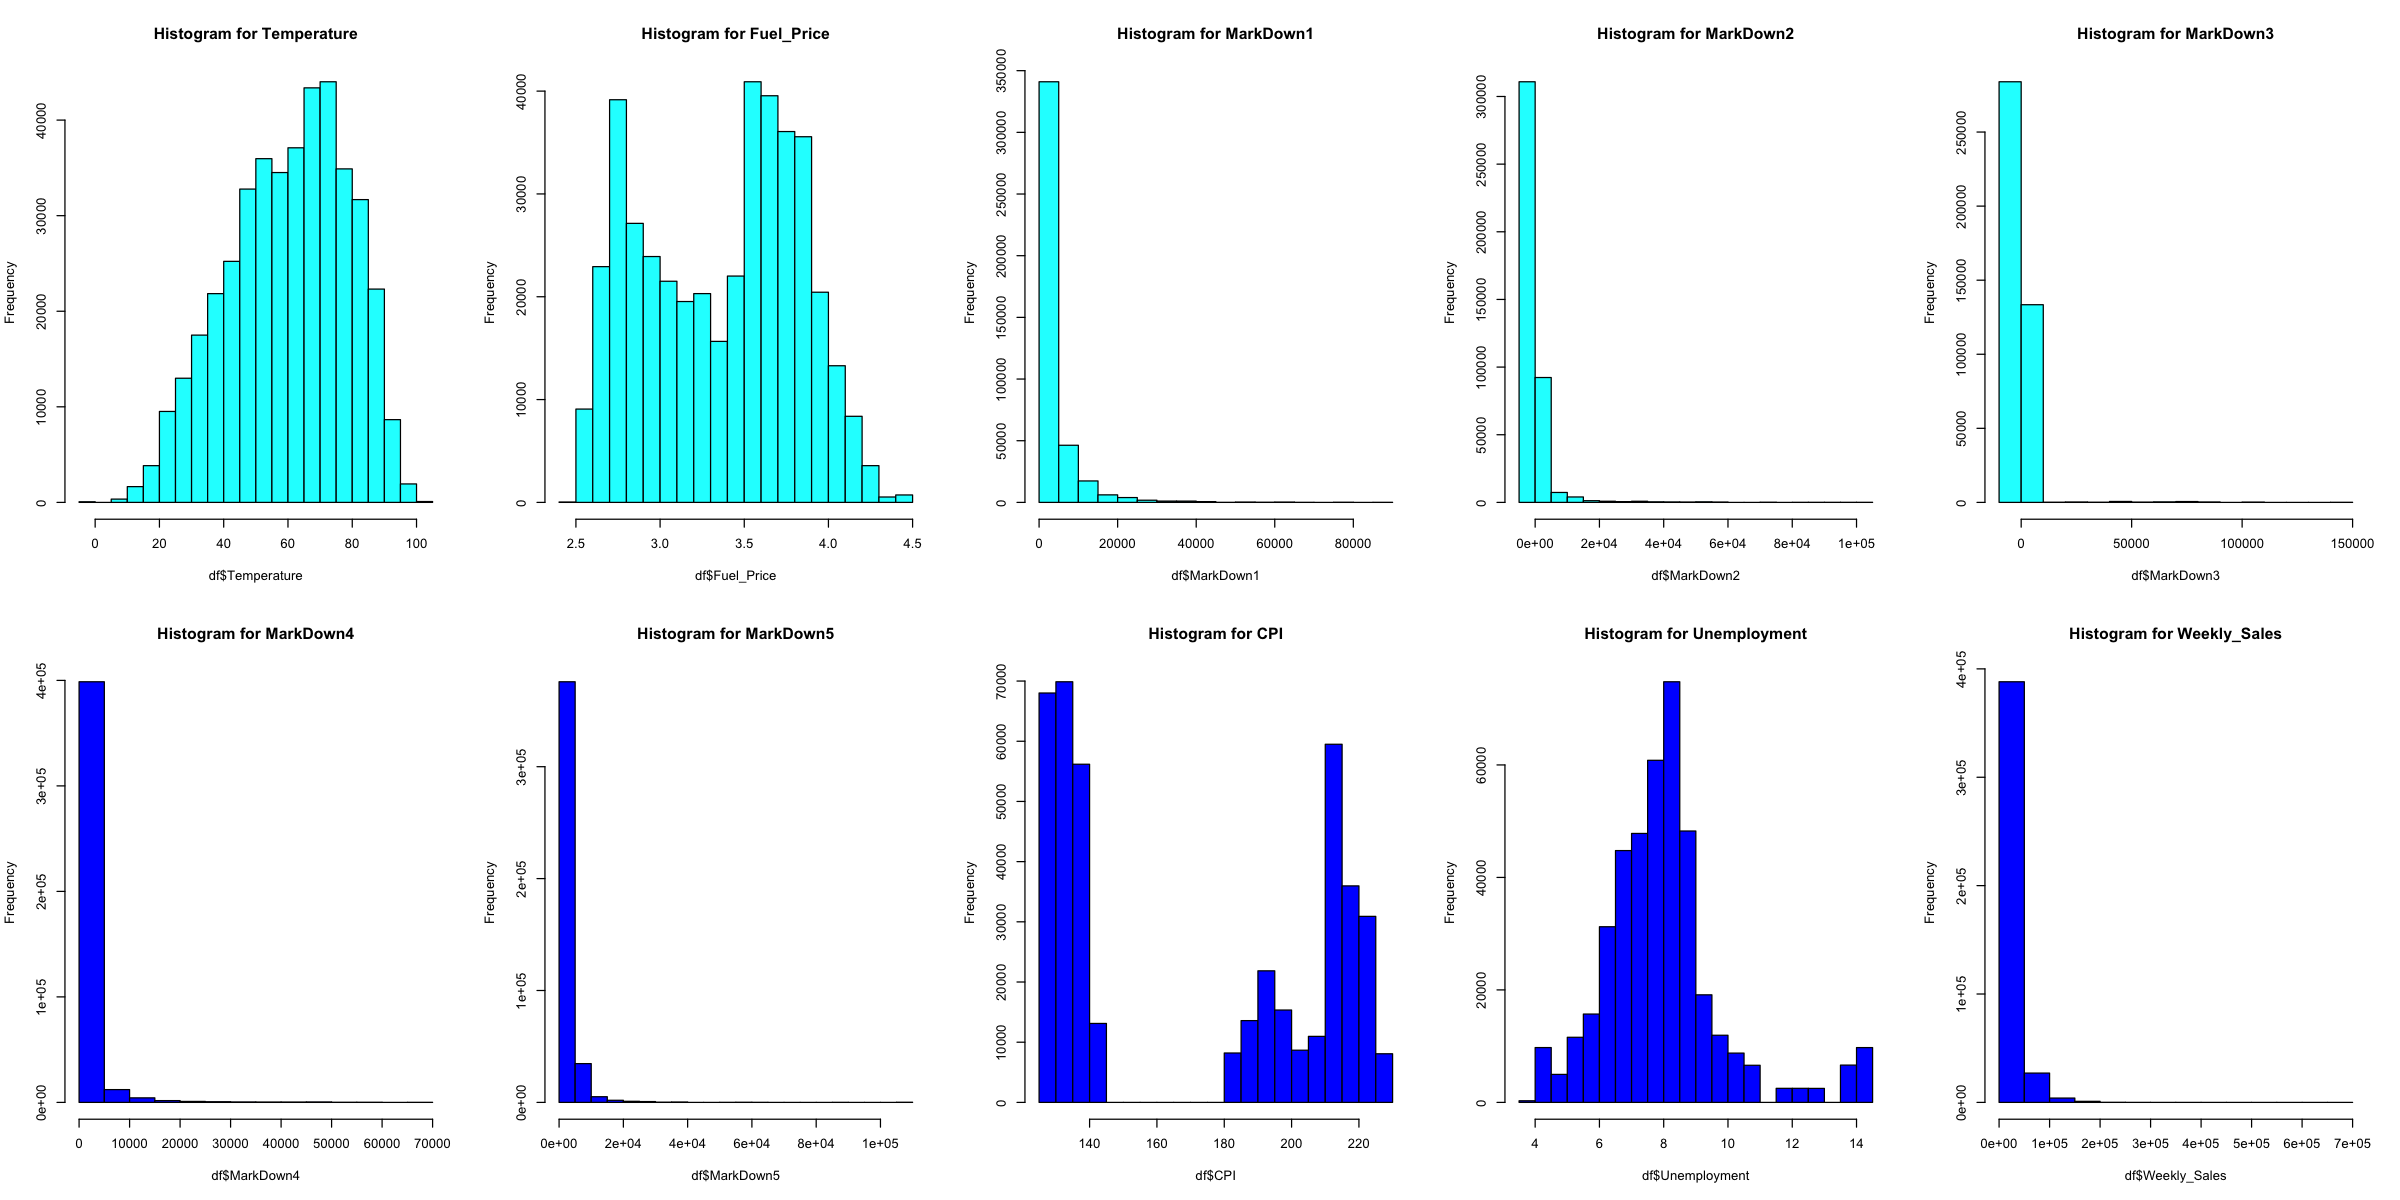

In [80]:
options(repr.plot.width = 20, repr.plot.height = 10)
par(mfrow = c(2, 5))

hist(df$Temperature, col="cyan", main = "Histogram for Temperature")
hist(df$Fuel_Price , col="cyan", main = "Histogram for Fuel_Price")
hist(df$MarkDown1 , col="cyan", main = "Histogram for MarkDown1")
hist(df$MarkDown2 , col="cyan", main = "Histogram for MarkDown2")
hist(df$MarkDown3 , col="cyan", main = "Histogram for MarkDown3")
hist(df$MarkDown4 , col="blue", main = "Histogram for MarkDown4")
hist(df$MarkDown5 , col="blue", main = "Histogram for MarkDown5")
hist(df$CPI , col="blue", main = "Histogram for CPI")
hist(df$Unemployment, col="blue", main = "Histogram for Unemployment")
hist(df$Weekly_Sales, col="blue", main = "Histogram for Weekly_Sales")

- Most of the features appear skewed with exception of `Unemployment`.

### 3. Outlier Detection and Treatment

#### Boxplots

As you may have noticed from the histogram of `newspaper`, there may be a few **outliers**. Let's look at some boxplots to see in further detail. Note that R classifies potential outliers by the "IQR criterion". 

This criterion means that all observations above $q_{0.75}+1.5\times IQR$ or below $q_{0.25}-1.5\times IQR$ are classified as outliers, where

$q_{0.25}$ is the first quartile;

$q_{0.75}$ is the third quartile.

IQR is the interquartile range, defined as the difference between the third and first quartile.

A boxplot will "flag" the outliers. Construct a boxplot for each variable and comment on the existence of potential outliers.

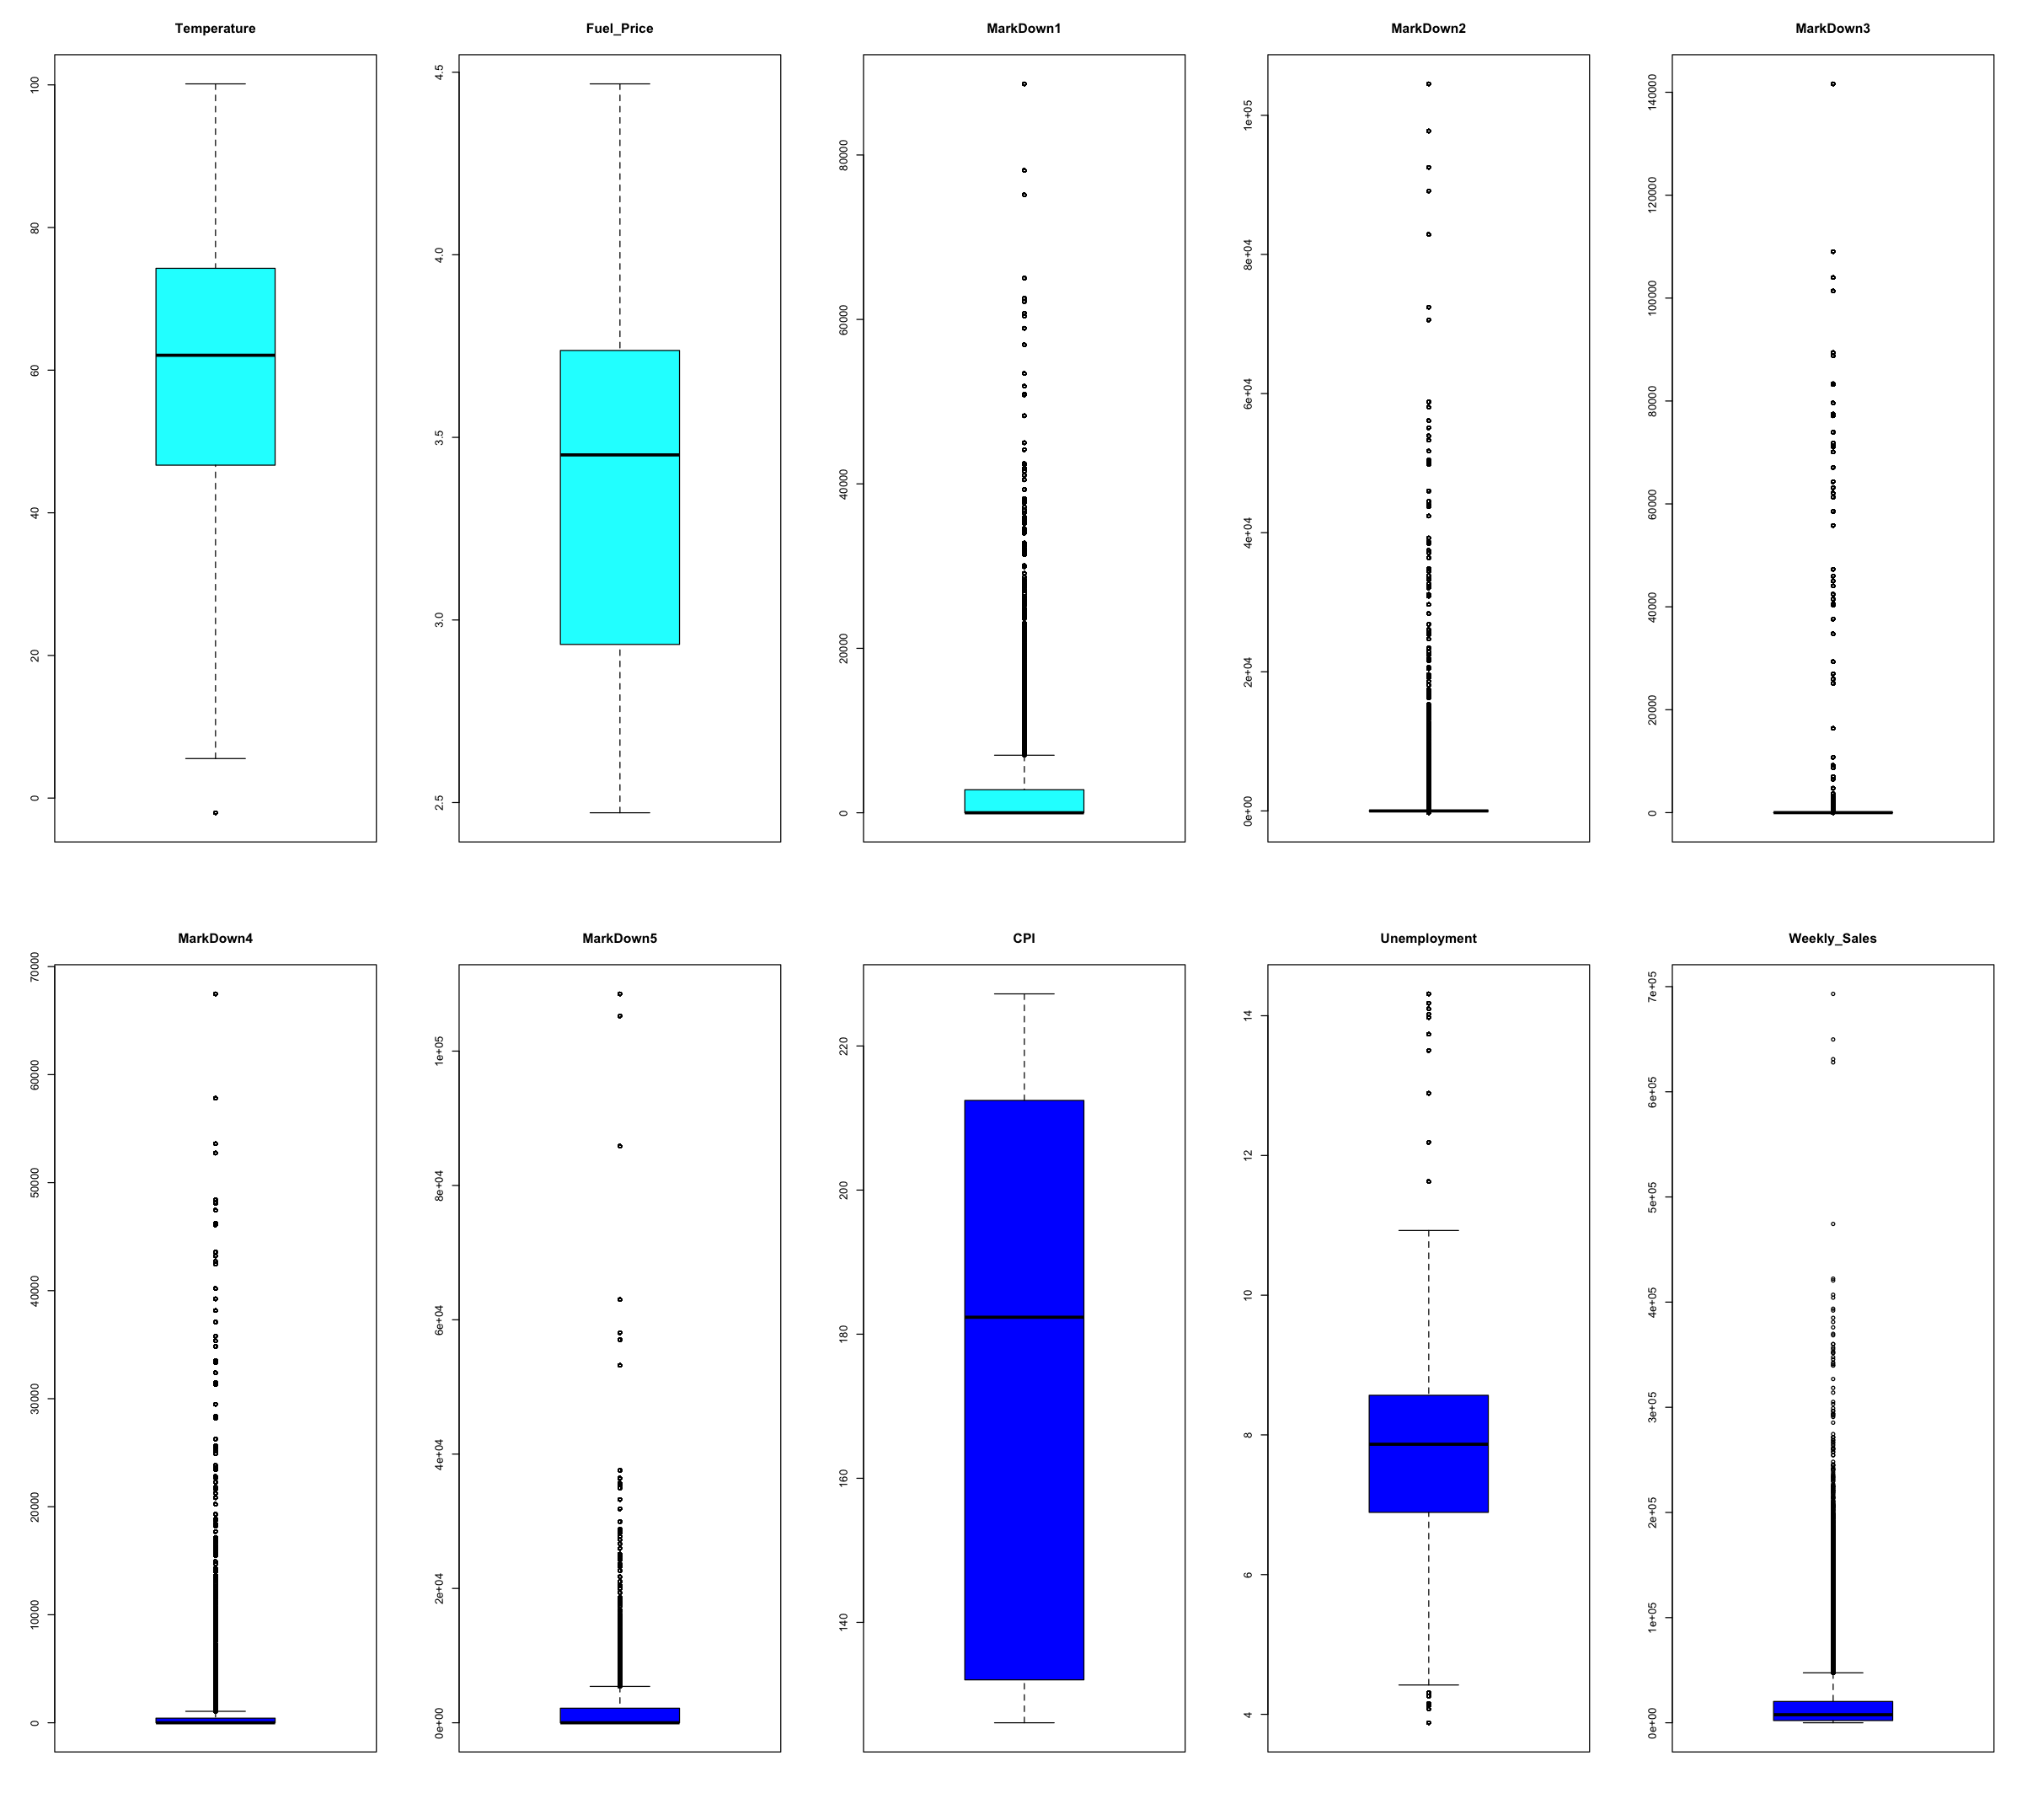

In [81]:
options(repr.plot.width = 20, repr.plot.height = 18)
par(mfrow = c(2, 5))

boxplot(df$Temperature, col="cyan", main = "Temperature")
boxplot(df$Fuel_Price , col="cyan", main = "Fuel_Price")
boxplot(df$MarkDown1 , col="cyan", main = "MarkDown1")
boxplot(df$MarkDown2 , col="cyan", main = "MarkDown2")
boxplot(df$MarkDown3 , col="cyan", main = "MarkDown3")
boxplot(df$MarkDown4 , col="blue", main = "MarkDown4")
boxplot(df$MarkDown5 , col="blue", main = "MarkDown5")
boxplot(df$CPI , col="blue", main = "CPI")
boxplot(df$Unemployment, col="blue", main = "Unemployment")
boxplot(df$Weekly_Sales, col="blue", main = "Weekly_Sales")

As we know, any value

- above Quartile_3 + 1.5IQR or lower than Quartile_1 - 1.5IQR could be classified as an outlier

#### Outlier Treatment

In [82]:
# Weakly Sales
Weekly_Sales_zscores <- scale(df$Weekly_Sales)
outliers <- which(abs(Weekly_Sales_zscores) > 3)
df$Weekly_Sales[outliers] <- mean(df$Weekly_Sales)

# Temperature
Temperature_zscores <- scale(df$Temperature)
outliers <- which(abs(Temperature_zscores) > 3)
df$Temperature[outliers] <- mean(df$Temperature)

# Fuel_Price
Fuel_Price_zscores <- scale(df$Fuel_Price)
outliers <- which(abs(Fuel_Price_zscores) > 3)
df$Fuel_Price[outliers] <- mean(df$Fuel_Price)

# MarkDown
MarkDown1_zscores <- scale(df$MarkDown1)
outliers <- which(abs(MarkDown1_zscores) > 3)
df$MarkDown1[outliers] <- mean(df$MarkDown1)

MarkDown2_zscores <- scale(df$MarkDown2)
outliers <- which(abs(MarkDown2_zscores) > 3)
df$MarkDown2[outliers] <- mean(df$MarkDown2)

MarkDown3_zscores <- scale(df$MarkDown3)
outliers <- which(abs(MarkDown3_zscores) > 3)
df$MarkDown3[outliers] <- mean(df$MarkDown3)

MarkDown4_zscores <- scale(df$MarkDown4)
outliers <- which(abs(MarkDown4_zscores) > 3)
df$MarkDown4[outliers] <- mean(df$MarkDown4)

MarkDown5_zscores <- scale(df$MarkDown5)
outliers <- which(abs(MarkDown5_zscores) > 3)
df$MarkDown5[outliers] <- mean(df$MarkDown5)

# CPI
CPI_zscores <- scale(df$CPI)
outliers <- which(abs(CPI_zscores) > 3)
df$CPI[outliers] <- mean(df$CPI)

# Unemployment
Unemployment_zscores <- scale(df$Unemployment)
outliers <- which(abs(Unemployment_zscores) > 3)
df$Unemployment[outliers] <- mean(df$Unemployment)

In [86]:
# Export csv to local
write.csv(df, "data/Preprocessed_Dataset.csv", row.names=FALSE)

In [87]:
# # # LOAD
df = read.csv("data/Preprocessed_Dataset.csv", sep = ",")
# df = convert_to_knowns(df, date_format="%Y-%m-%d")
# df

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<fct>,<dbl>,<fct>,<dbl>
1,2010-02-05,42.31,2.572,0,0,0,0,0,211.0964,8.106,FALSE,56,2567.36,A,151315
1,2010-02-05,42.31,2.572,0,0,0,0,0,211.0964,8.106,FALSE,31,3455.92,A,151315
1,2010-02-05,42.31,2.572,0,0,0,0,0,211.0964,8.106,FALSE,33,8589.77,A,151315
1,2010-02-05,42.31,2.572,0,0,0,0,0,211.0964,8.106,FALSE,8,40129.01,A,151315
1,2010-02-05,42.31,2.572,0,0,0,0,0,211.0964,8.106,FALSE,85,3825.78,A,151315
1,2010-02-05,42.31,2.572,0,0,0,0,0,211.0964,8.106,FALSE,45,37.44,A,151315
1,2010-02-05,42.31,2.572,0,0,0,0,0,211.0964,8.106,FALSE,28,1085.29,A,151315
1,2010-02-05,42.31,2.572,0,0,0,0,0,211.0964,8.106,FALSE,79,46729.77,A,151315
1,2010-02-05,42.31,2.572,0,0,0,0,0,211.0964,8.106,FALSE,55,21249.31,A,151315


### 4. Bivariate explorations

Let's now explore how the variables may or may not relate to each other. First, calculate the correlations between variables. Correlations can help us meaasure the strength of the linear relationship between variables. The bland way to do this is with to cor() function.

#### Correlation Plots

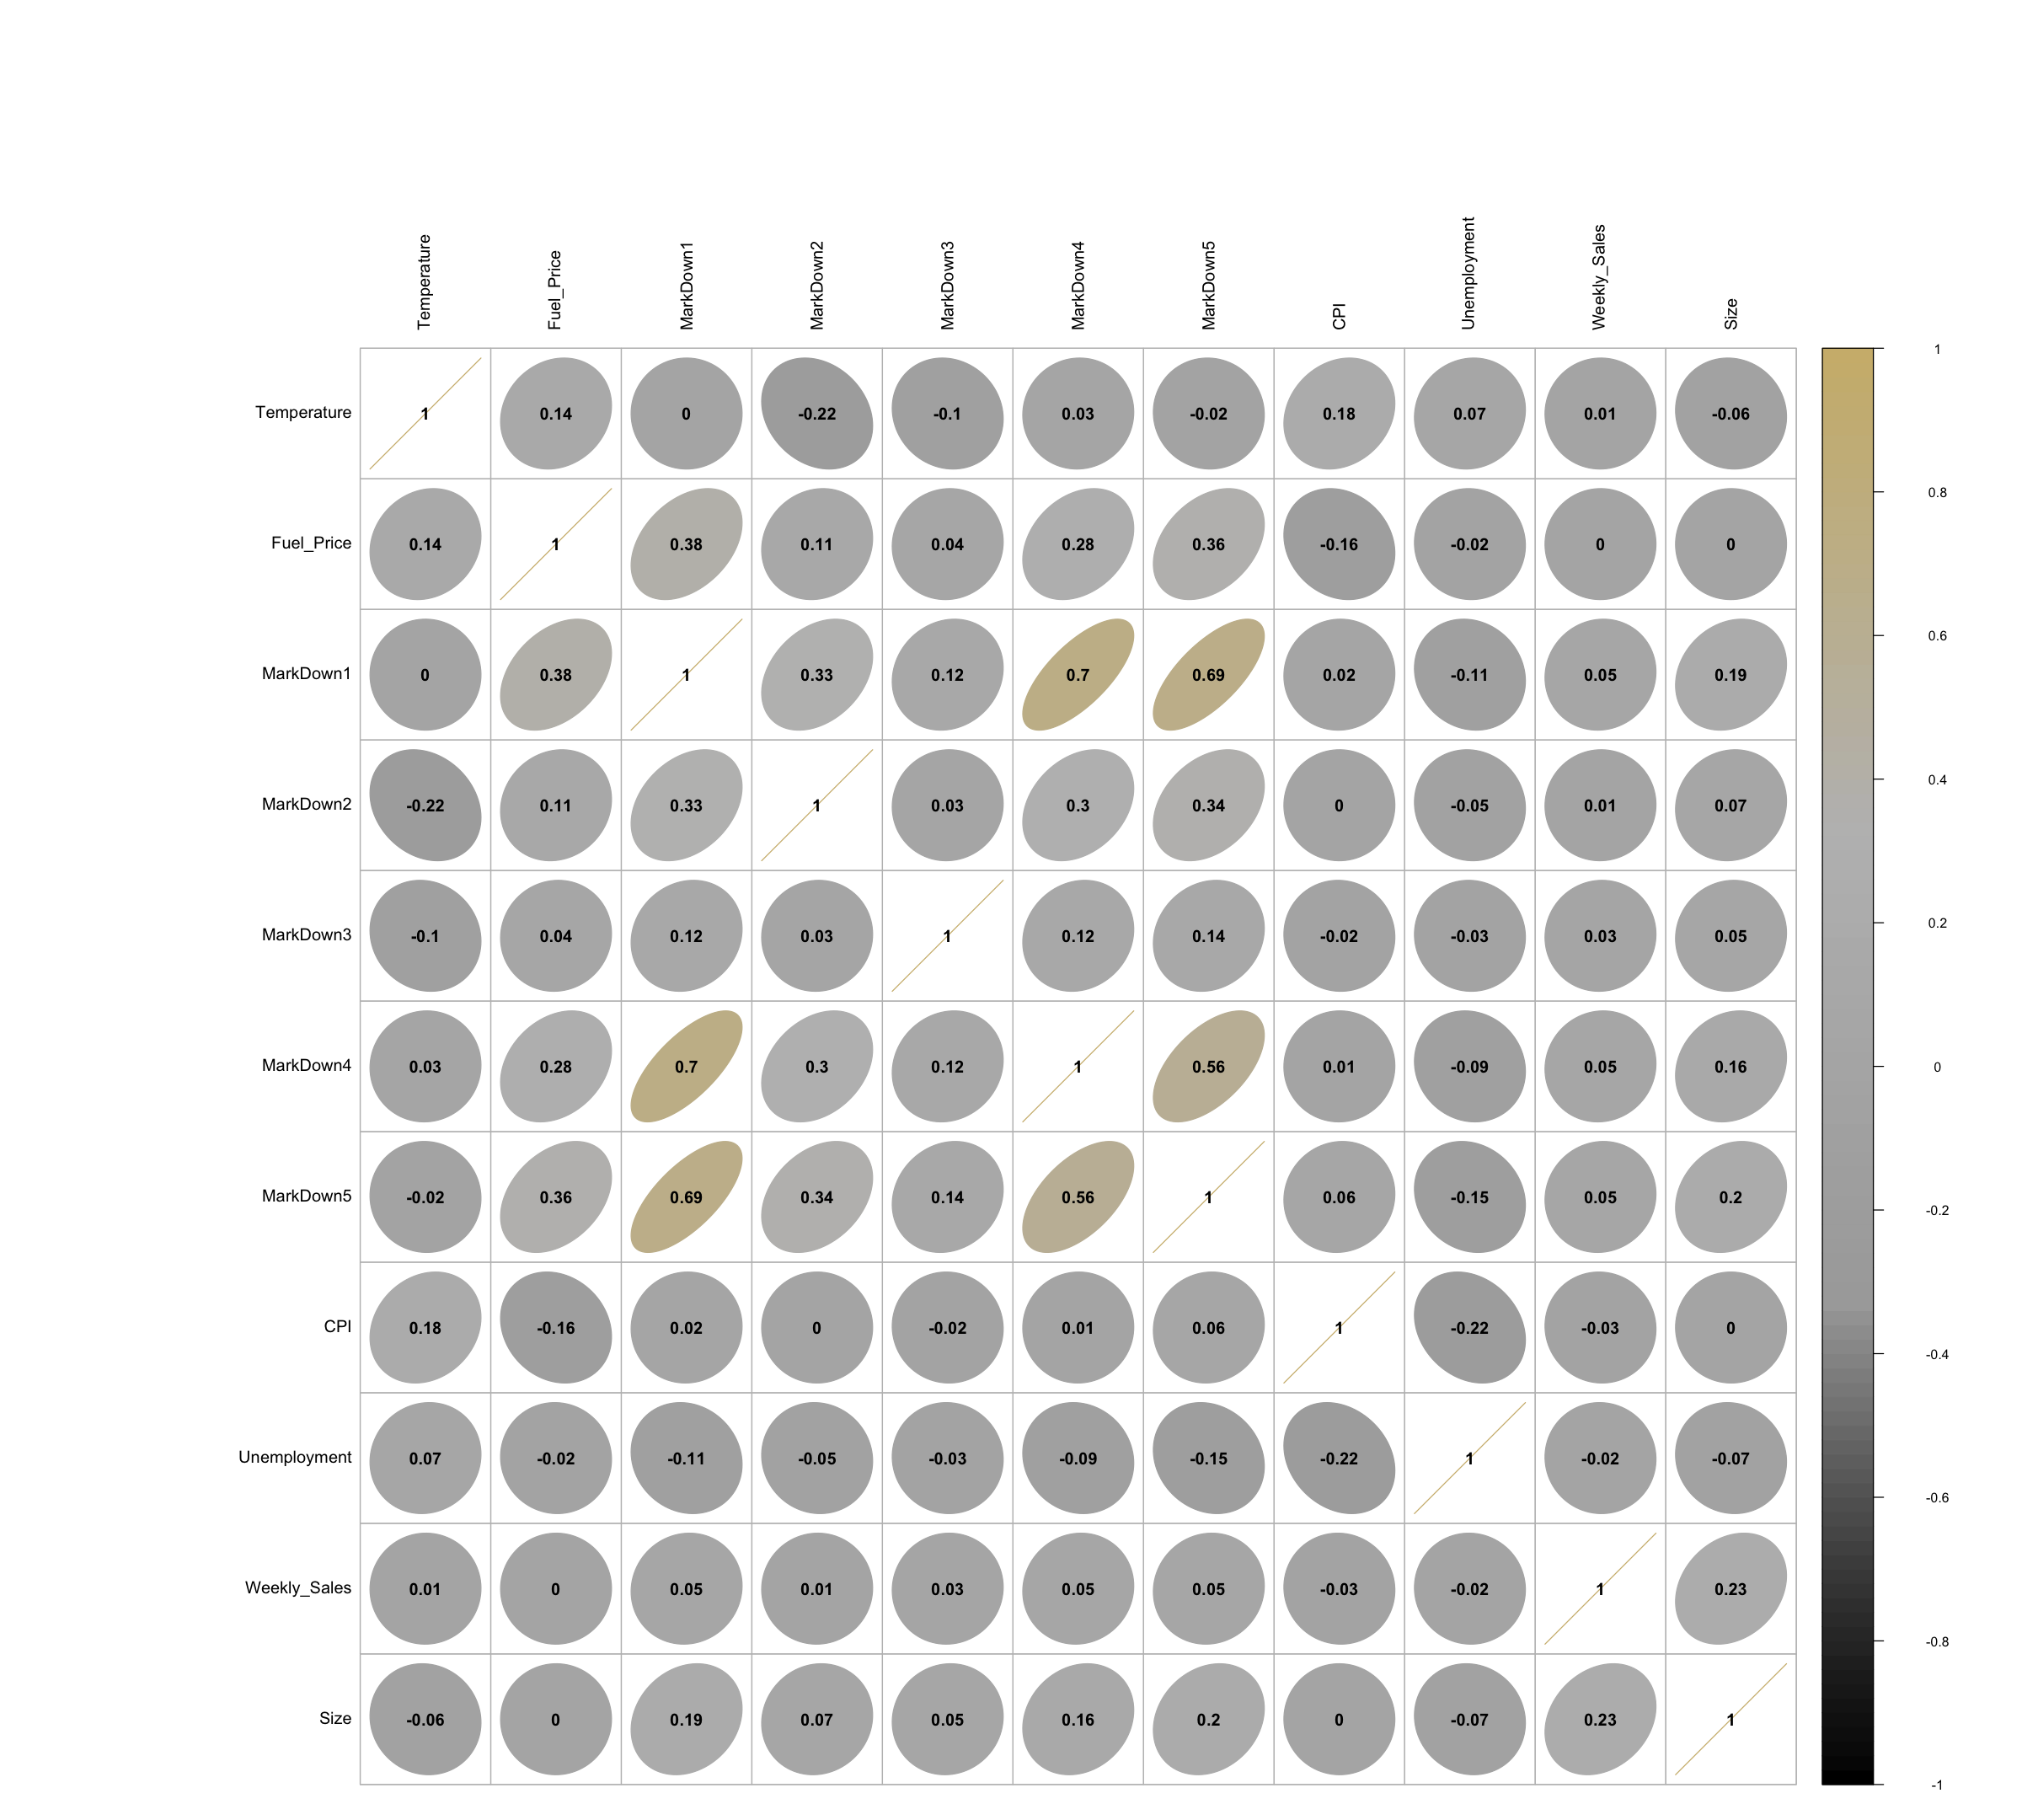

In [69]:
col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(df[numerical_cols]), method = "ellipse", col = col4(100),  addCoef.col = "black", tl.col = "black")

Correlation: -1 to +1 with 0 being no-correlation.

- **With Response**: 
    - Youtube and Sales are highly positively correlated. 
    - Facebook is somewhat correlated (medium) with Sales.
    - Newspaper is not correlated with Sales.


- **Amongst Features**: 
    - Feature vs feature relationships appear insignificant, which is good for proceeding with a linear regression technique owing to linearity and un-correlated features amongst themselves.



In [ ]:
#Plotting the Stores with the highest Average Store Sales, to select the one of the top 5 stores
ggplot(data=dum_dataf, aes(x=reorder(factor(Store), -Avg_Store_Sales), y=Avg_Store_Sales)) +
  geom_bar(stat="identity", fill="brown") +
  xlab('Store') +
  ylab('Average Store Sales')

### 4. Scatter Pairplots

However, knowing correlations alone isn't enough; the correlation coefficient can be misleading if there are nonlinear relationships, and so we should explore the relationships further.

To do so, we'll look at pairwise scatter plots, i.e., a scatter plot of each variable with each other variable. We should be looking for:

- Relationships between the response and each predictor.
- Relationships between predictor variables. Such relationships are undesirable.

Create all possible pairwise scatter plots of the data (the pairs() function may help). Comment on the observed relationships.

In [ ]:
pairs(df[numerical_cols], main="Weekly Sales Data", pch=21,  bg=c("#CFB87C"))

Relationship b/w Response and Predictors:

- **Youtube vs Sales**: The sales exhibit low variability and quite close to a non-linear relationship (close to logarithmic) when the YouTube budget is small, but once the budget starts increasing there is a significant change in Sales variability, tending towards a non-linear relationship with positive correlation.


- **Facebook vs Sales**: The sales exhibit low variability and a close to a linear relationship when the Facebook budget is small, but as the budget increases the Sales variability changes to a lot, as well as the relationship could also be towards a non-linear.


- **Newspaper vs Sales**: The data is distributed all around and there isn't seems to be a visible pattern, however with any budget, one could say the Sales exhibit high variability all around.


Relationship amongst Predictors:

- Youtube vs Facebook: No visible relationship.
- Youtube vs Newspaper: No visible relationship.
- Facebook vs Newspaper: No visible relationship.



----
----

# 7. Transformation


# 5. Train - Test Split

In [17]:
set.seed(7)

sample <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.75,0.2))
train  <- df[sample, ]
test   <- df[!sample, ]

cat("Number of records in Training set:", nrow(train))
cat("\nNumber of records in Testing set:", nrow(test))

Number of records in Training set: 157
Number of records in Testing set: 43

----
----